# Example 1 - Extract parameters from a force signal

Detect onset and offset of a signal,  the first maximum and maximum variation on production of force.

In [24]:
%pylab inline
import novainstrumentation as ni
from pylab import *
import seaborn

Populating the interactive namespace from numpy and matplotlib


## 1. Load data and plot 

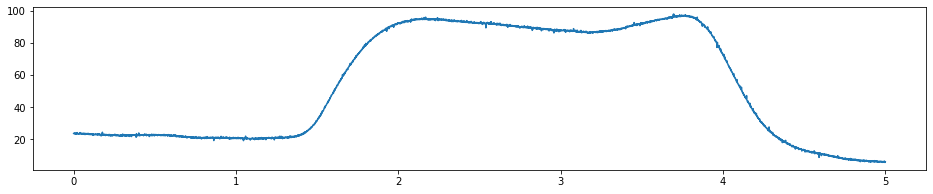

In [7]:
figure(figsize=(16,3))
t,s = loadtxt('../data/force.txt')
plot(t,s)

## 2. Clean and ressample
Execute: 
* a) smooth filter with a window of 100 samples  
* b) do ressample both time and signal subsanling a ration of 1:10
* c) plot result


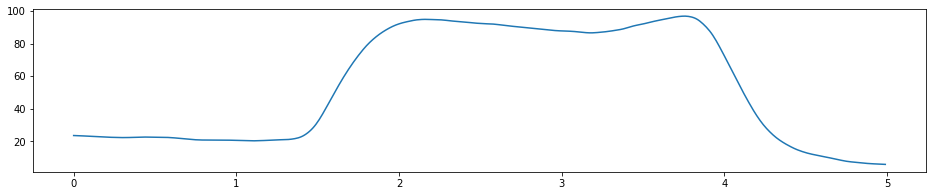

In [13]:
figure(figsize=(16,3))
ss = ni.smooth(s,100)
rs = ss[::10]
rt = t[::10]

plot(rt,rs)

## 3. Extract activation information:

* a) On set time - 5% of the full scale above the minimum
* b) Off set time 
* b) Activation time - From onset to offset
* c) First maximum delay from onset
* d) Max production of force delay

Anottate on the graph with vertical lines

In [29]:
fullscale = max(rs[0:len(rs)//2])-min(rs[0:len(rs)//2])

print(fullscale)
b = rs > min(rs[0:len(rs)//2])+fullscale*0.05
print(b)
rt[where(b)[0][0]]

74.52945088584396
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  T

1.43

Onset: 0.000000 s
Offset: 0.000000 s
Activation time: 0.000000 s
First maximum delay: 0.000000 s
Delay to derivate maximum: 0.000000 s


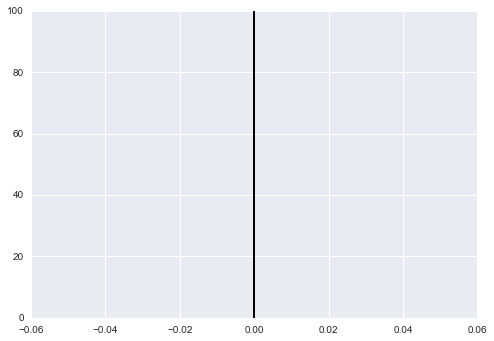

In [6]:
fullscale = max(rs[0:len(rs)//2])-min(rs[0:len(rs)//2])

print(fullscale)
b = rs > min(rs[0:len(rs)//2])+fullscale*0.05
print(b)
onset = rt[where(b)[0][0]]

print "Onset: %f s" % onset



offset = rt[where(b)[0][-1]]
print "Offset: %f s" % offset

act_time = offset-onset
print "Activation time: %f s" % act_time

first_max =  0 # use threshold above 60
print "First maximum delay: %f s" % (first_max - onset)

t_max_diff = 0 # use thresold on the derivative of 0.1
print "Delay to derivate maximum: %f s" % (t_max_diff - onset)


vlines([onset,offset,first_max,t_max_diff], 0, 100)